In [1]:
import pandas as pd
import os
from tqdm.notebook import tqdm

import matplotlib.pyplot as plt
%matplotlib inline

## Read COVID-19 data

In [2]:
covid_df = pd.read_csv(os.path.join('raw_data','owid-covid-data.csv'), parse_dates=['date'])
#Change names to merge dataframes later
covid_df = covid_df.replace('United States', 'USA')
covid_df = covid_df.replace('United Kingdom', 'UnitedKingdom')
covid_df = covid_df.replace('Czechia', 'CzechRepublic')
covid_df = covid_df.replace('Colombia', 'Columbia')
covid_df = covid_df.replace('Dominican Republic', 'DominicanRepublic')
covid_df = covid_df.replace('Luxembourg', 'Luxemborg')
covid_df = covid_df.replace('Hong Kong', 'HongKong')
covid_df = covid_df.replace('El Salvador', 'ElSalvador')
covid_df = covid_df.replace('New Zealand', 'NewZealand')
covid_df = covid_df.replace('Costa Rica', 'CostaRica')

covid_df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [3]:
covid_df[covid_df['location'].str.contains('Rica')]

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
34239,CRI,North America,CostaRica,2020-03-06,1.0,1.0,NaN,NaN,NaN,NaN,...,6.4,17.4,83.841,1.13,80.28,0.81,NaN,NaN,NaN,NaN
34240,CRI,North America,CostaRica,2020-03-07,1.0,0.0,NaN,NaN,NaN,NaN,...,6.4,17.4,83.841,1.13,80.28,0.81,NaN,NaN,NaN,NaN
34241,CRI,North America,CostaRica,2020-03-08,5.0,4.0,NaN,NaN,NaN,NaN,...,6.4,17.4,83.841,1.13,80.28,0.81,NaN,NaN,NaN,NaN
34242,CRI,North America,CostaRica,2020-03-09,9.0,4.0,NaN,NaN,NaN,NaN,...,6.4,17.4,83.841,1.13,80.28,0.81,NaN,NaN,NaN,NaN
34243,CRI,North America,CostaRica,2020-03-10,9.0,0.0,NaN,NaN,NaN,NaN,...,6.4,17.4,83.841,1.13,80.28,0.81,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34954,CRI,North America,CostaRica,2022-02-19,783437.0,0.0,3763.429,7894.0,0.0,17.429,...,6.4,17.4,83.841,1.13,80.28,0.81,NaN,NaN,NaN,NaN
34955,CRI,North America,CostaRica,2022-02-20,783437.0,0.0,3763.429,7894.0,0.0,17.429,...,6.4,17.4,83.841,1.13,80.28,0.81,NaN,NaN,NaN,NaN
34956,CRI,North America,CostaRica,2022-02-21,790444.0,7007.0,3417.714,7936.0,42.0,18.571,...,6.4,17.4,83.841,1.13,80.28,0.81,NaN,NaN,NaN,NaN
34957,CRI,North America,CostaRica,2022-02-22,793835.0,3391.0,3258.286,7954.0,18.0,17.857,...,6.4,17.4,83.841,1.13,80.28,0.81,NaN,NaN,NaN,NaN


In [4]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164015 entries, 0 to 164014
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype         
---  ------                                      --------------   -----         
 0   iso_code                                    164015 non-null  object        
 1   continent                                   154189 non-null  object        
 2   location                                    164015 non-null  object        
 3   date                                        164015 non-null  datetime64[ns]
 4   total_cases                                 161010 non-null  float64       
 5   new_cases                                   160981 non-null  float64       
 6   new_cases_smoothed                          159830 non-null  float64       
 7   total_deaths                                143260 non-null  float64       
 8   new_deaths                                  143436 non-null  float64      

In [5]:
covid_lite_df= covid_df['location date new_cases_smoothed new_cases_smoothed_per_million'.split()]

In [6]:
covid_lite_df.head()

,location,date,new_cases_smoothed,new_cases_smoothed_per_million
0,Afghanistan,2020-02-24,NaN,NaN
1,Afghanistan,2020-02-25,NaN,NaN
2,Afghanistan,2020-02-26,NaN,NaN
3,Afghanistan,2020-02-27,NaN,NaN
4,Afghanistan,2020-02-28,NaN,NaN


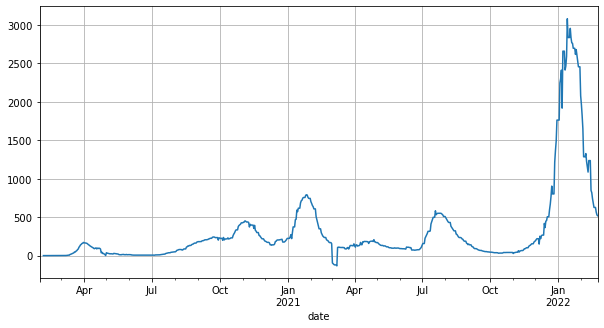

In [7]:
country_covid_ts= covid_lite_df[covid_lite_df['location']=='Spain'].set_index('date');
country_covid_ts['new_cases_smoothed_per_million'].plot(grid=True, figsize=(10,5));

### Read songs' features

In [8]:
mood_features= 'danceability valence energy'.split()

In [9]:
ranking_features_df= pd.read_csv(os.path.join('generated_data', 'ranking_features.csv'), index_col=0, parse_dates=['Date', 'release_date'])

In [10]:
ranking_features_df.head()

,Position,Track Name,Artist,Streams,URL,Date,Region,song_id,release_date,danceability,valence,energy,id
0,1,Échame La Culpa,"Luis Fonsi, Demi Lovato",26459,1zsG4eaZmkA1dvjDDsAGLK,2018-01-01,Ecuador,1zsG4eaZmkA1dvjDDsAGLK,2017-11-17,0.724,0.64,0.895,1zsG4eaZmkA1dvjDDsAGLK
1,2,Échame La Culpa,"Luis Fonsi, Demi Lovato",24103,1zsG4eaZmkA1dvjDDsAGLK,2018-01-02,Ecuador,1zsG4eaZmkA1dvjDDsAGLK,2017-11-17,0.724,0.64,0.895,1zsG4eaZmkA1dvjDDsAGLK
2,3,Échame La Culpa,"Luis Fonsi, Demi Lovato",24702,1zsG4eaZmkA1dvjDDsAGLK,2018-01-03,Ecuador,1zsG4eaZmkA1dvjDDsAGLK,2017-11-17,0.724,0.64,0.895,1zsG4eaZmkA1dvjDDsAGLK
3,3,Échame La Culpa,"Luis Fonsi, Demi Lovato",24584,1zsG4eaZmkA1dvjDDsAGLK,2018-01-04,Ecuador,1zsG4eaZmkA1dvjDDsAGLK,2017-11-17,0.724,0.64,0.895,1zsG4eaZmkA1dvjDDsAGLK
4,3,Échame La Culpa,"Luis Fonsi, Demi Lovato",25531,1zsG4eaZmkA1dvjDDsAGLK,2018-01-05,Ecuador,1zsG4eaZmkA1dvjDDsAGLK,2017-11-17,0.724,0.64,0.895,1zsG4eaZmkA1dvjDDsAGLK


In [11]:
continents = {}
continents['europe']=['Portugal', 'Italy', 'Germany', 'Finland', 'Estonia', 'Hungary', 
                      'Spain', 'Slovakia', 'Ireland', 'Iceland', 'France',  'Norway', 
                      'Lithuania', 'Turkey', 'Switzerland', 'Belgium', 'Denmark',  
                      'Poland', 'Austria', 'Sweden', 'CzechRepublic', 'Netherlands',
                      'UnitedKingdom',  'Latvia', 'Greece', 'Luxemborg']
continents['north_america']= 'USA Canada'.split()
continents['south_america']=['Ecuador', 'Panama', 'Peru',  'Uruguay', 'CostaRica',
                            'Mexico', 'Argentina', 'ElSalvador', 'Chile', 'Brazil', 
                            'Honduras', 'Guatemala','Bolivia', 'Columbia','DominicanRepublic', 'Paraguay']
continents['oceania']='Australia NewZealand'.split()
continents['asia']= ['Indonesia', 'Malaysia', 'Philippines', 'Taiwan', 'Japan', 'Singapore', 'HongKong']

In [12]:
ranking_features_df['Region'].unique()

array(['Ecuador', 'Portugal', 'Panama', 'Italy', 'Germany', 'Finland',
       'Estonia', 'Hungary', 'Spain', 'Peru', 'Slovakia', 'Ireland',
       'Indonesia', 'Iceland', 'Brazil', 'Canada', 'Belgium', 'Uruguay',
       'CostaRica', 'Malaysia', 'Mexico', 'France', 'Argentina', 'Norway',
       'Lithuania', 'Philippines', 'Taiwan', 'NewZealand', 'Turkey',
       'USA', 'ElSalvador', 'Chile', 'Japan', 'Honduras', 'Guatemala',
       'Switzerland', 'Denmark', 'Bolivia', 'Poland', 'Austria', 'Sweden',
       'CzechRepublic', 'Netherlands', 'Columbia', 'Singapore',
       'DominicanRepublic', 'UnitedKingdom', 'World', 'Paraguay',
       'Australia', 'Latvia', 'Greece', 'HongKong', 'Luxemborg'],
      dtype=object)

In [13]:
ranking_features_df['Date'].min(), ranking_features_df['Date'].max()

(Timestamp('2017-01-01 00:00:00'), Timestamp('2022-02-22 00:00:00'))

In [14]:
def plot_covid_song_features(song_feat_df, covid_df, country_lst, features):
    country_covid_ts= covid_lite_df[covid_lite_df['location'].isin(country_lst)].set_index('date');
    
    country_df = ranking_features_df[ranking_features_df['Region'].isin(country_lst)]
    daily_country_df = country_df.drop(columns='Position Streams'.split()).groupby('Date').mean()
                                    
    f, axes = plt.subplots(len(features), 1, figsize=(20,15), sharey='row', sharex='col')
    axe = axes.ravel()
    i=0
    for c in features:
        df = daily_country_df[c].to_frame()
        df['covid_cases']= country_covid_ts['new_cases_smoothed_per_million']
       
        ax2 = axe[i].twinx()
                                     
        corr_= df.dropna().corr().loc[c,'covid_cases']                             
                                     
        df[c].plot(ax=axe[i], color='blue', title=f'Country: {country_lst}. Feature: {c}. Corr: {corr_}');
        df['covid_cases'].plot(ax=ax2, grid=True, color='red');  
        
        i= i+1

def plot_covid_and_song_feature(song_feat_df, covid_df, country_lst, feature):
    
    country_covid_ts= covid_lite_df[covid_lite_df['location'].isin(country_lst)].set_index('date');

    country_df = ranking_features_df[ranking_features_df['Region'].isin(country_lst)]
    daily_country_df = country_df.drop(columns='Position Streams'.split()).groupby('Date').mean()
                                    
    f, ax = plt.subplots(1, 1, figsize=(10,4), sharey='row', sharex='col')
    df = daily_country_df[feature].to_frame()
    
    df['covid_19']= country_covid_ts['new_cases_smoothed_per_million']
       
    ax2 = ax.twinx()
    
    ax.set_xlabel('Time', fontsize=16)
    ax.set_ylabel(f'{feature}', fontsize=16, color='blue')
    ax.tick_params(axis='y', colors='blue')
    

    ax2.set_ylabel('COVID-19 cases per mill.', fontsize=16, color='red')    
    ax2.tick_params(axis='y', colors='red')
    
    df[feature].plot(ax=ax, color='blue');
    df['covid_19'].plot(ax=ax2, grid=True, color='red');
    plt.tight_layout()
    plt.savefig(os.path.join('figs','covid_vs_{}_{}.png'.format(feature, '_'.join(country_lst))))
        

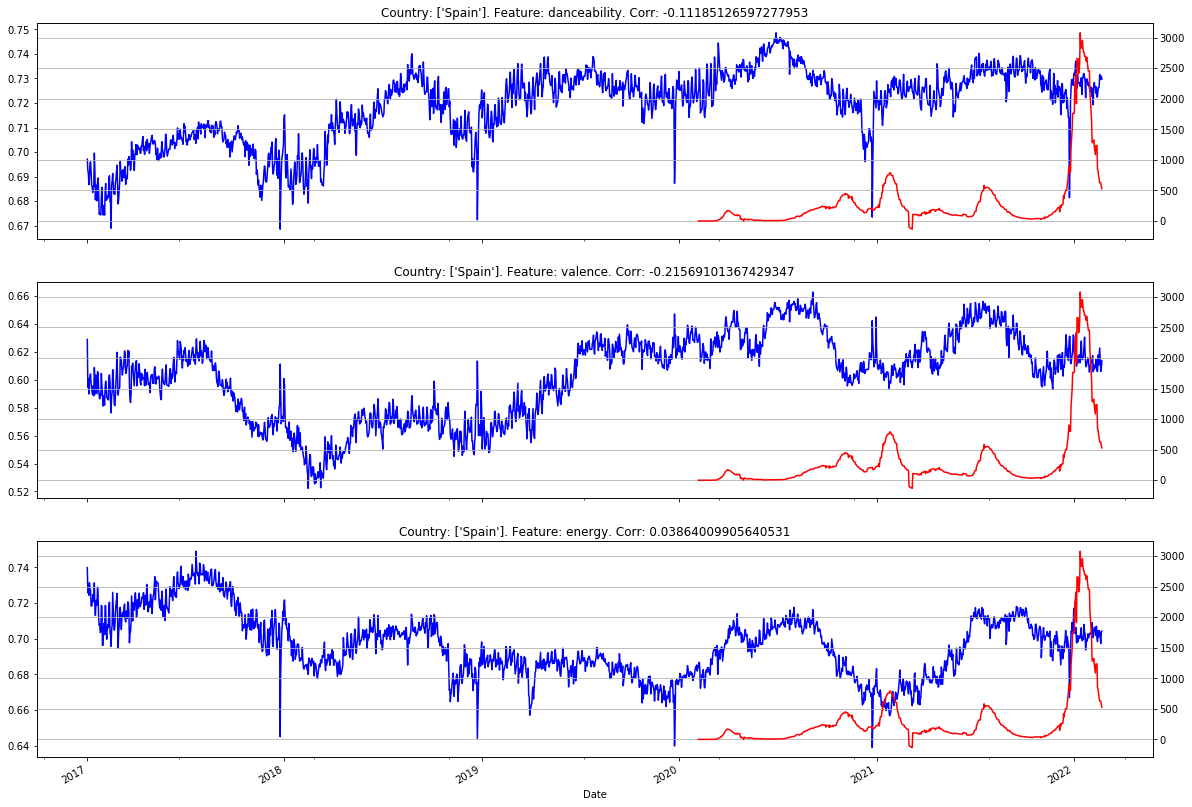

In [15]:
plot_covid_song_features(ranking_features_df, covid_lite_df, ['Spain'], mood_features)

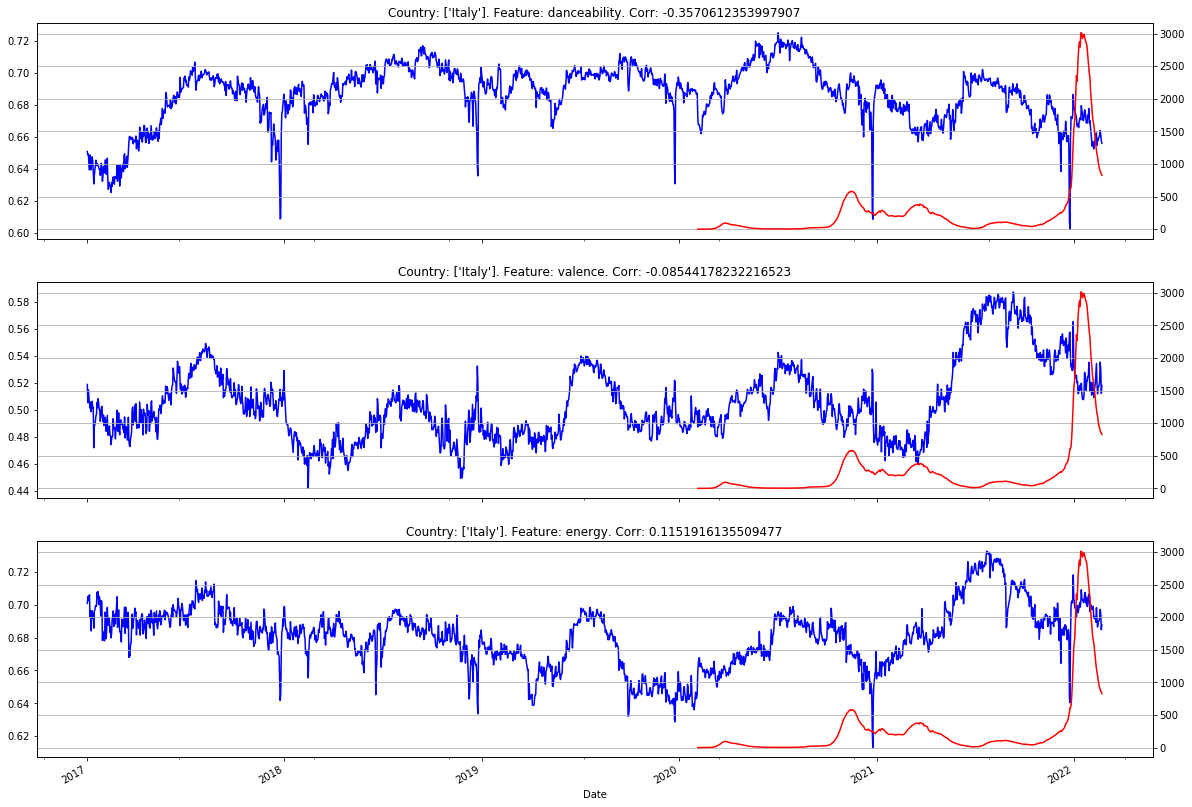

In [16]:
plot_covid_song_features(ranking_features_df, covid_lite_df, ['Italy'], mood_features)

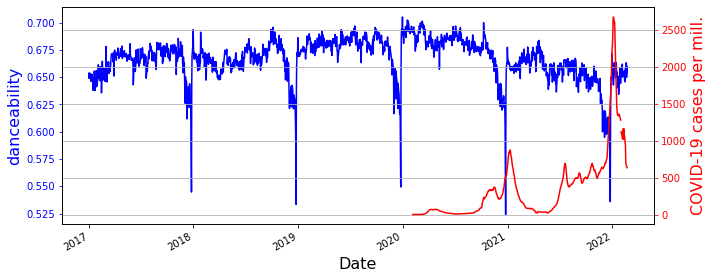

In [17]:
plot_covid_and_song_feature(ranking_features_df, covid_lite_df, ['UnitedKingdom'], 'danceability')

## PCC

In [18]:
def compute_corelations(song_feat_df, covid_df, features, countries_lst):

    corr_dict = []

    for c in tqdm(countries_lst, desc='Country'):
        f_dict= {} 
        f_dict['country']=c
        
        country_covid_ts= covid_df[covid_df['location']==c].set_index('date')  
        
        country_df = song_feat_df[song_feat_df['Region']==c]
        daily_country_df = country_df.drop(columns='Position Streams'.split()).groupby('Date').mean()
        
        for f in features:      
            
            df = daily_country_df[f].to_frame()
            df['covid_cases']= country_covid_ts['new_cases_smoothed_per_million']

            corr_= df.dropna().corr().loc[f,'covid_cases']                             
            f_dict[f]= corr_
        corr_dict.append(f_dict)
    
    return pd.DataFrame(corr_dict)
        
all_corr_df= compute_corelations(ranking_features_df, 
                                 covid_lite_df, 
                                 mood_features, 
                                 ranking_features_df['Region'].unique())        

Country:   0%|          | 0/54 [00:00<?, ?it/s]

In [19]:
all_corr_df.describe()

,danceability,valence,energy
count,54.000000,54.000000,54.000000
mean,-0.259017,-0.023161,0.068658
std,0.175763,0.203481,0.219386
min,-0.551016,-0.499678,-0.338238
25%,-0.382360,-0.132751,-0.104573
50%,-0.262357,-0.031045,0.041134
75%,-0.156999,0.121267,0.219560
max,0.309335,0.451006,0.573117


In [20]:
all_corr_df.sort_values(by='danceability', ascending=False)

,country,danceability,valence,energy
14,Brazil,0.309335,0.226805,-0.115404
32,Japan,0.200857,0.167671,-0.100897
31,Chile,0.004419,-0.140367,-0.113887
33,Honduras,0.002795,0.284409,0.060532
13,Iceland,-0.010236,0.026058,-0.112282
30,ElSalvador,-0.043632,-0.277059,-0.069123
52,HongKong,-0.092360,0.049187,0.018138
40,Sweden,-0.094225,0.077221,-0.096136
8,Spain,-0.111851,-0.215691,0.038640
27,NewZealand,-0.124251,0.118711,0.384591


In [21]:
all_corr_df.sort_values(by='valence', ascending=False)

,country,danceability,valence,energy
19,Malaysia,-0.347661,0.451006,0.573117
49,Australia,-0.187287,0.334986,0.520996
42,Netherlands,-0.144124,0.285451,0.016132
33,Honduras,0.002795,0.284409,0.060532
14,Brazil,0.309335,0.226805,-0.115404
44,Singapore,-0.205415,0.200871,0.375275
51,Greece,-0.384280,0.192024,0.533860
1,Portugal,-0.306778,0.187758,0.315812
39,Austria,-0.348607,0.177672,0.037487
46,UnitedKingdom,-0.515637,0.173411,0.074646


In [22]:
all_corr_df.sort_values(by='energy', ascending=False)

,country,danceability,valence,energy
19,Malaysia,-0.347661,0.451006,0.573117
51,Greece,-0.384280,0.192024,0.533860
49,Australia,-0.187287,0.334986,0.520996
47,World,-0.521647,-0.114870,0.471549
27,NewZealand,-0.124251,0.118711,0.384591
44,Singapore,-0.205415,0.200871,0.375275
50,Latvia,-0.307046,-0.265021,0.366467
6,Estonia,-0.501942,-0.499678,0.344821
1,Portugal,-0.306778,0.187758,0.315812
53,Luxemborg,-0.258331,0.102987,0.245592


### Plot as maps

In [23]:
import geopandas as gpd

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
#correct some name inconsistences
world.loc[4,'name']='USA'
world.loc[143,'name']='UnitedKingdom'
world.loc[17,'name']='DominicanRepublic'
world.loc[153,'name']='CzechRepublic'
world.loc[37,'name']='ElSalvador'
world.loc[136,'name']='NewZealand'
world.loc[34,'name']='CostaRica'
world.loc[128,'name']='Luxemborg'

world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,USA,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [24]:
world_with_values= world.merge(all_corr_df, left_on='name', right_on='country')

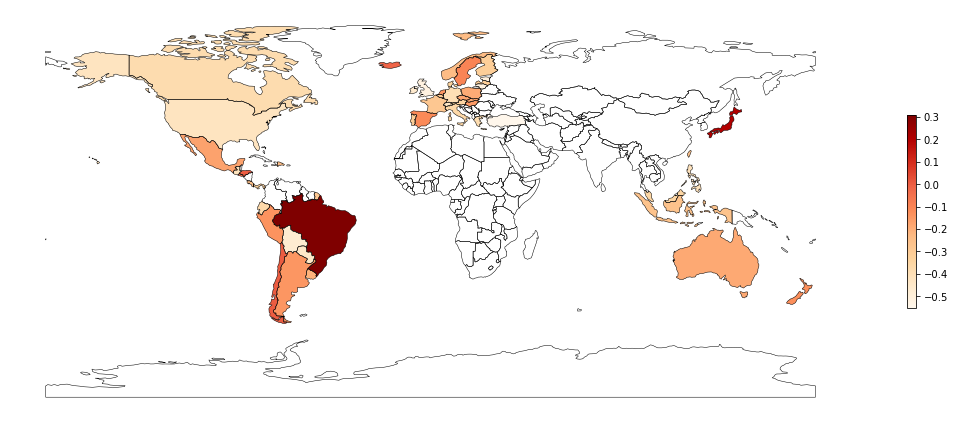

In [25]:
ax=world_with_values.plot(column='danceability', legend=True, figsize=(15,7), cmap='OrRd',legend_kwds={'shrink': 0.4});
world.boundary.plot(ax=ax, linewidth=0.5, edgecolor='black');
ax.set_axis_off();
plt.tight_layout()
plt.savefig(os.path.join('figs','pcc_covid_danceability_map.png'))

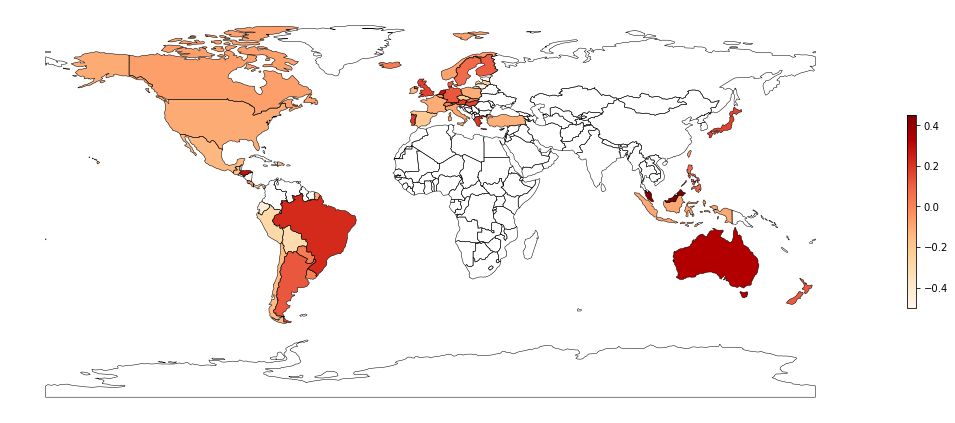

In [26]:
ax=world_with_values.plot(column='valence', legend=True, figsize=(15,7), cmap='OrRd',legend_kwds={'shrink': 0.4});
world.boundary.plot(ax=ax, linewidth=0.5, edgecolor='black');
ax.set_axis_off();
plt.tight_layout();
plt.savefig(os.path.join('figs','pcc_covid_valence_map.png'))

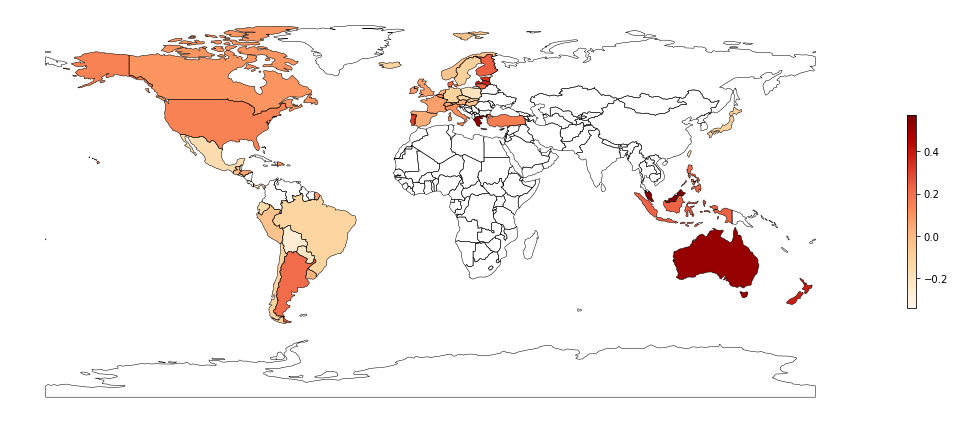

In [27]:
ax=world_with_values.plot(column='energy', legend=True, figsize=(15,7),cmap='OrRd',legend_kwds={'shrink': 0.4});
world.boundary.plot(ax=ax, linewidth=0.5, edgecolor='black');
ax.set_axis_off();
plt.tight_layout()
plt.savefig(os.path.join('figs','pcc_covid_energy_map.png'))